<a href="https://colab.research.google.com/github/lmoroney/tfbook/blob/master/chapter3/Horse_or_Human_WithAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2023-05-02 09:19:55--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   248MB/s    in 0.6s    

2023-05-02 09:19:56 (248 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2023-05-02 09:19:56--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicati

In [4]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(300, 300),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
# validation_data=validation_generator 使うと、
# 学習したモデルの推論結果がすべて human になるように学習されてしまう可能性がある

#history = model.fit_generator(
#      train_generator,
#     steps_per_epoch=8,  
#      epochs=15,
#      verbose=1,
#      validation_data=validation_generator)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

<ipython-input-20-a3caac6830e1>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 0.4271 - acc: 0.8042
Epoch 2/15
8/8 [==============================] - 22s 3s/step - loss: 0.4771 - acc: 0.7959
Epoch 3/15
8/8 [==============================] - 20s 2s/step - loss: 0.4163 - acc: 0.7887
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.4301 - acc: 0.7998
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 0.4206 - acc: 0.7942
Epoch 6/15
8/8 [==============================] - 19s 2s/step - loss: 0.4380 - acc: 0.7809
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.3436 - acc: 0.8610
Epoch 8/15
8/8 [==============================] - 19s 2s/step - loss: 0.2809 - acc: 0.9132
Epoch 9/15
8/8 [==============================] - 19s 2s/step - loss: 0.3869 - acc: 0.8254
Epoch 10/15
8/8 [==============================] - 19s 2s/step - loss: 0.2614 - acc: 0.8832
Epoch 11/15
8/8 [==============================] - 20s 2s/step - loss: 0.2299 - acc: 0.90

In [21]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])

train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])

validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])

validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse04-6.png', 'horse36-3.png', 'horse33-2.png', 'horse47-6.png', 'horse44-9.png', 'horse12-9.png', 'horse47-9.png', 'horse11-4.png', 'horse13-3.png', 'horse20-0.png']
['human04-06.png', 'human17-09.png', 'human03-09.png', 'human11-00.png', 'human16-29.png', 'human01-27.png', 'human10-03.png', 'human10-13.png', 'human11-01.png', 'human13-05.png']
['horse3-217.png', 'horse5-405.png', 'horse4-599.png', 'horse4-439.png', 'horse4-302.png', 'horse1-384.png', 'horse1-568.png', 'horse5-164.png', 'horse4-345.png', 'horse1-510.png']
['valhuman03-07.png', 'valhuman03-22.png', 'valhuman04-18.png', 'valhuman05-18.png', 'valhuman04-13.png', 'valhuman02-12.png', 'valhuman03-16.png', 'valhuman03-19.png', 'valhuman05-09.png', 'valhuman02-23.png']


In [22]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

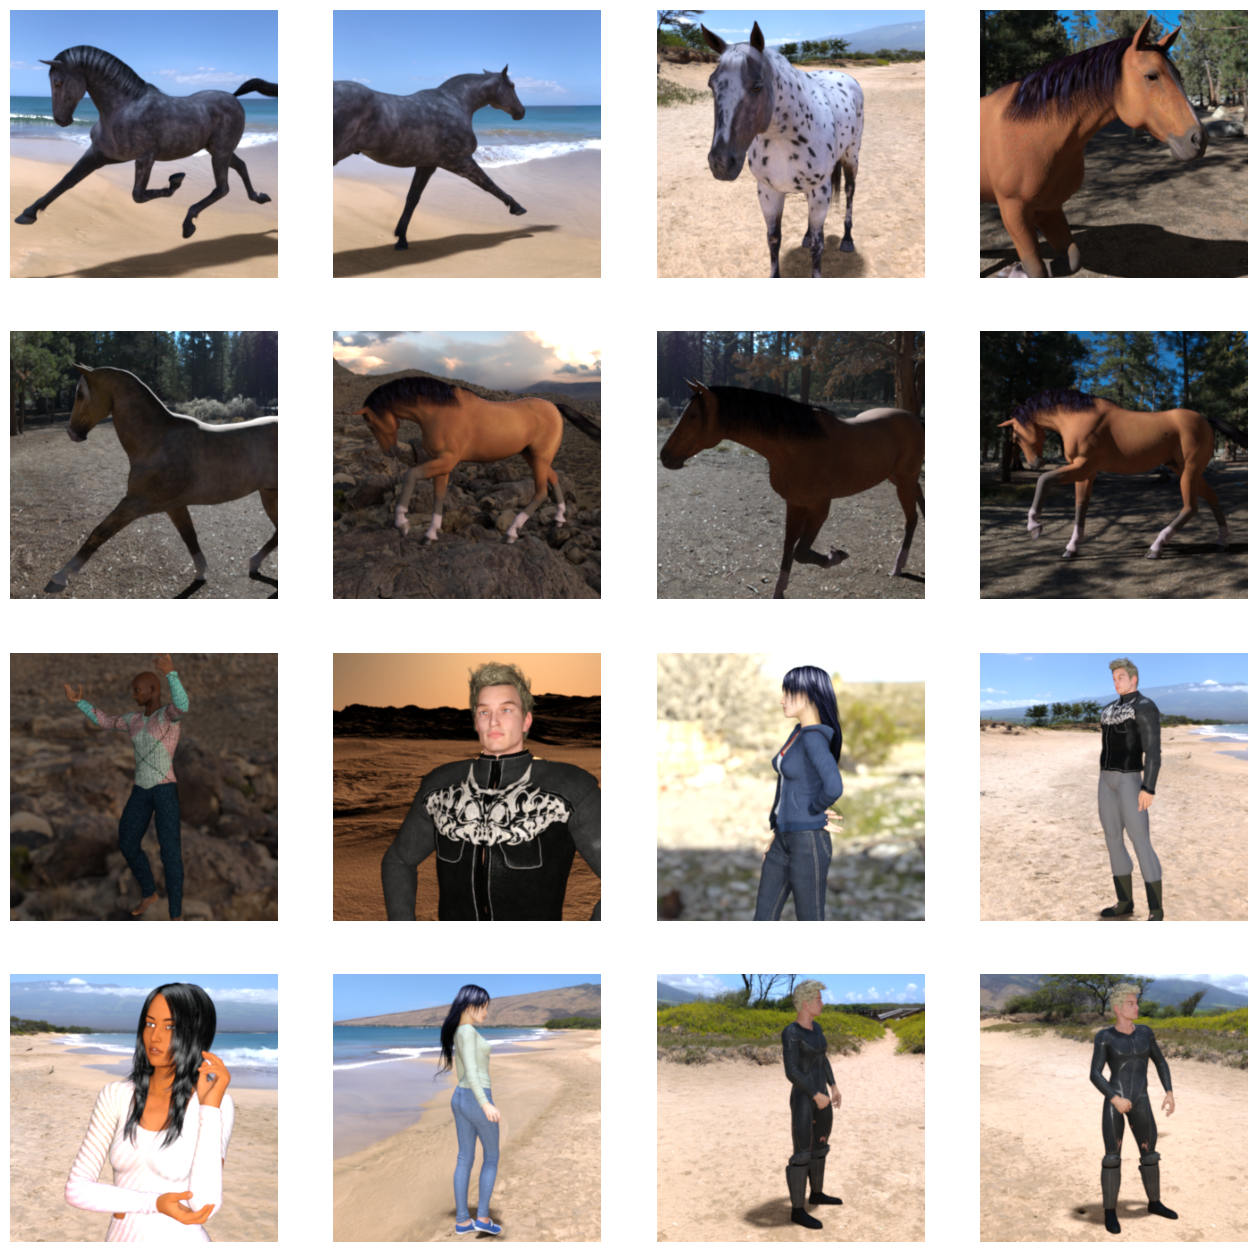

In [16]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



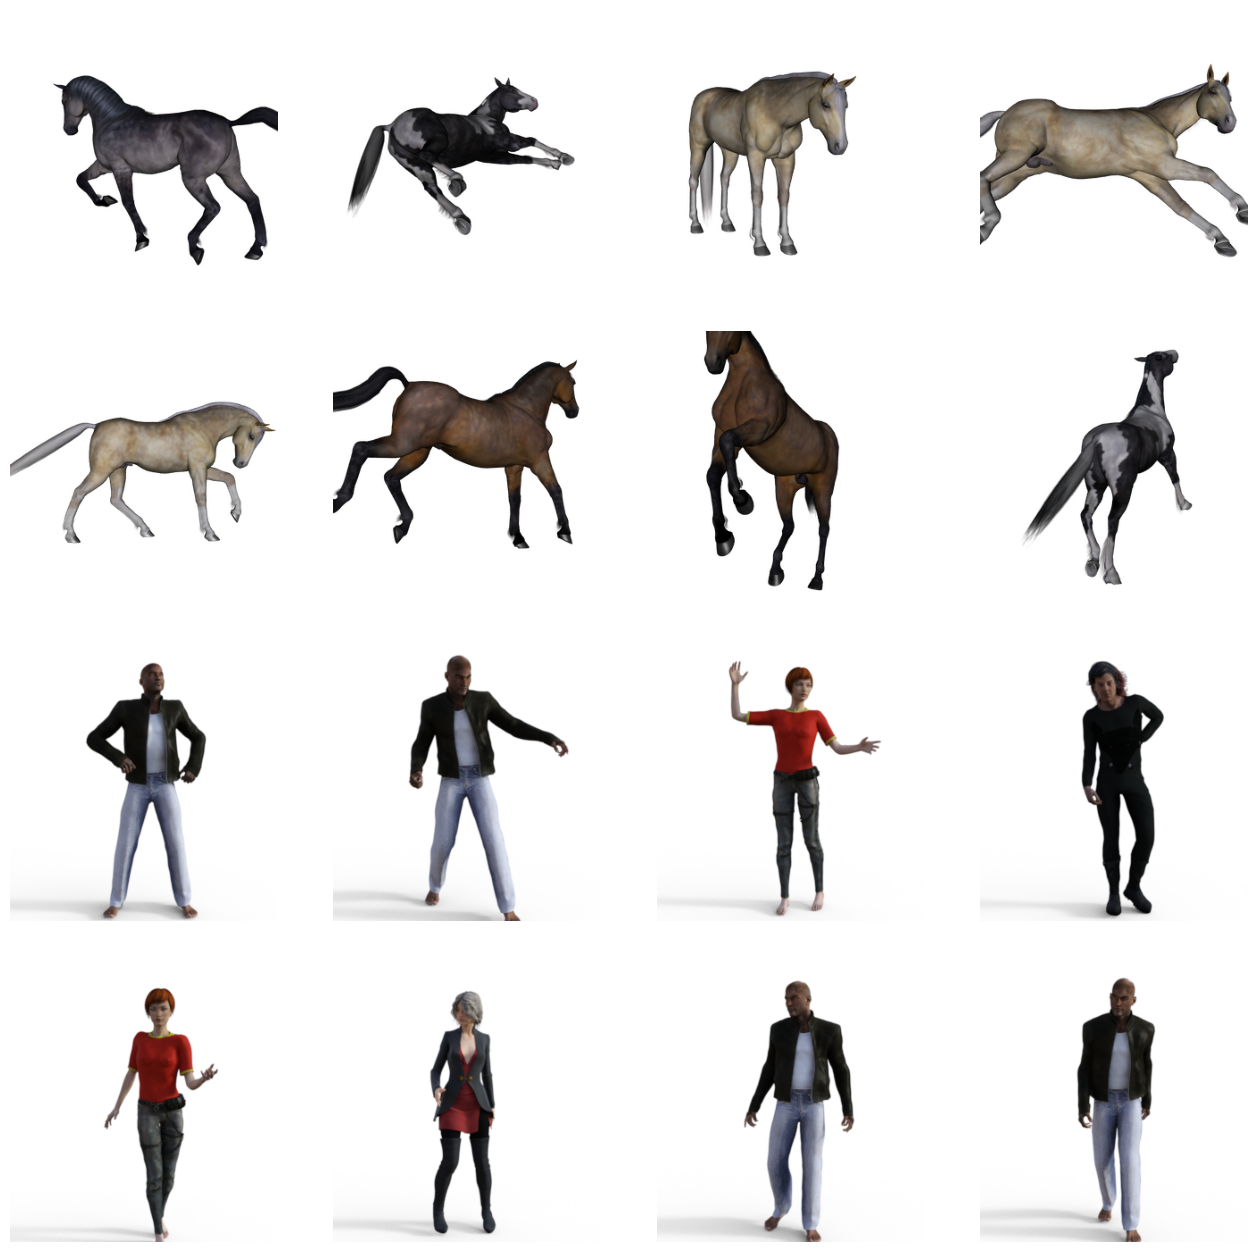

In [18]:
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(validation_horse_dir, fname) 
                for fname in validation_horse_hames[pic_index-8:pic_index]]
next_human_pix = [os.path.join(validation_human_dir, fname) 
                for fname in validation_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



1/1 [==============================] - 0s 96ms/step


<ipython-input-23-599011d229ee>:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


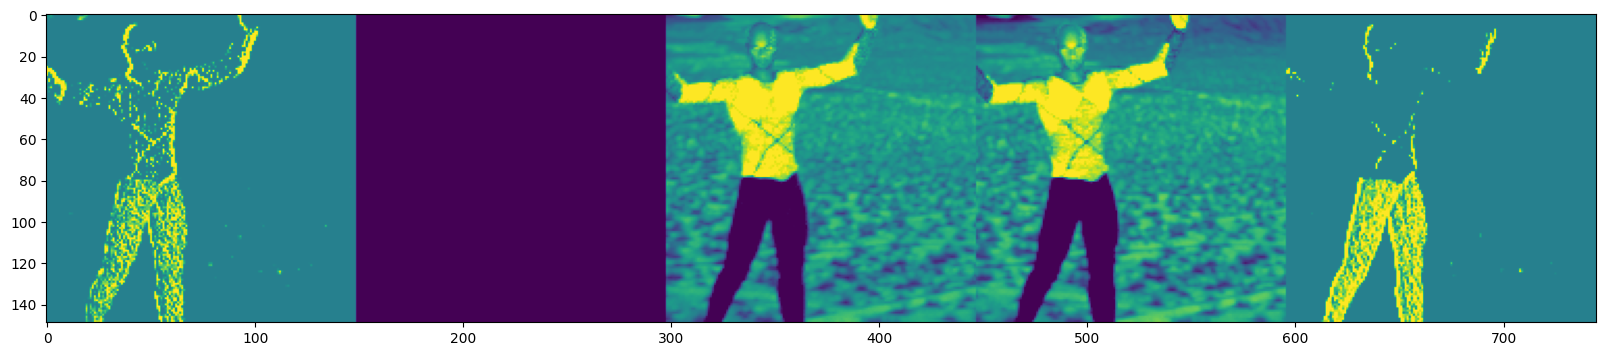

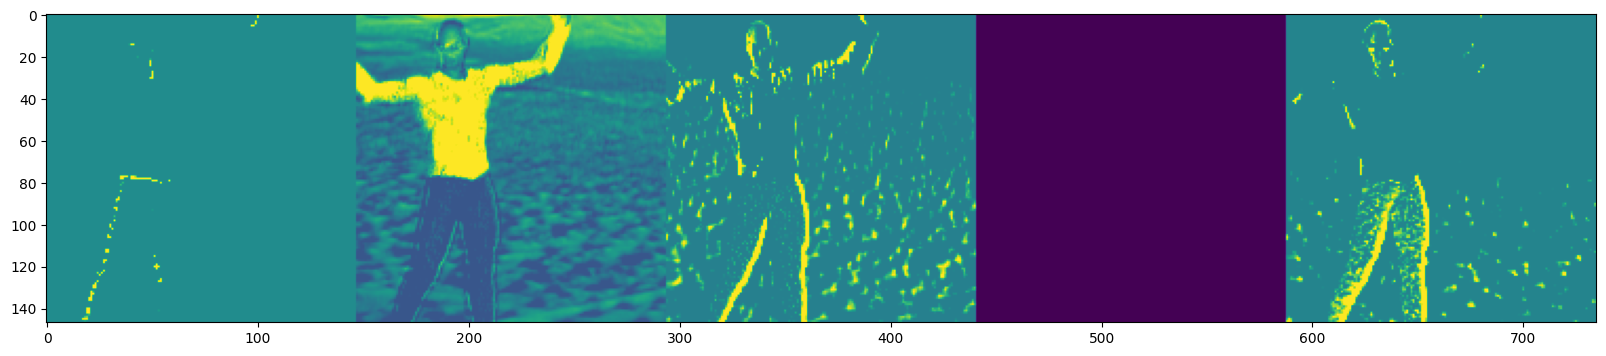

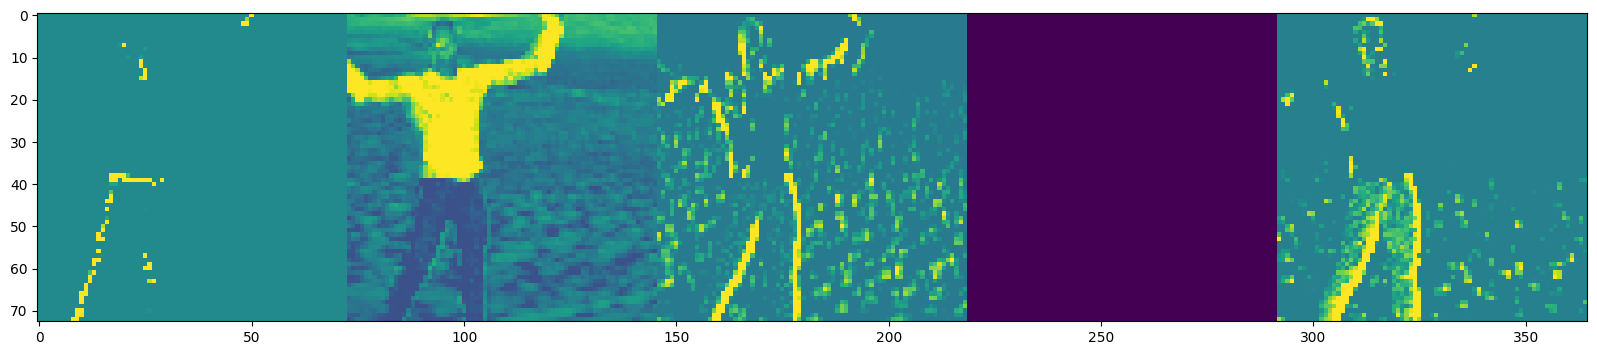

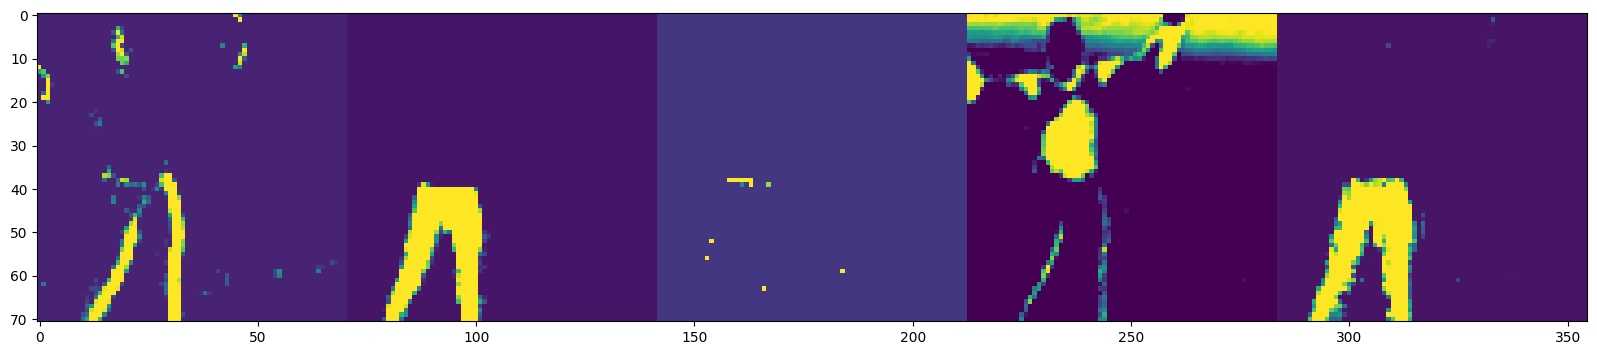

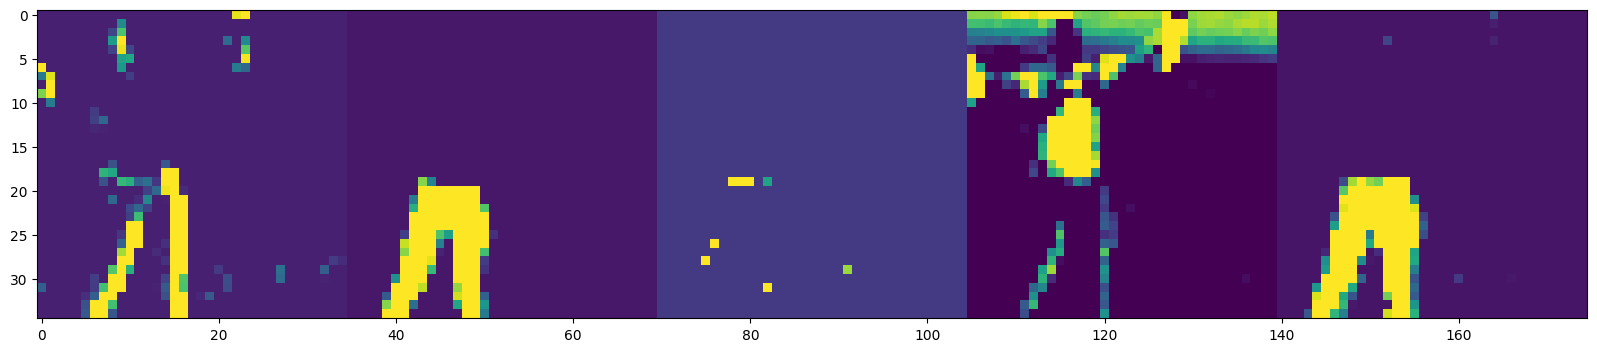

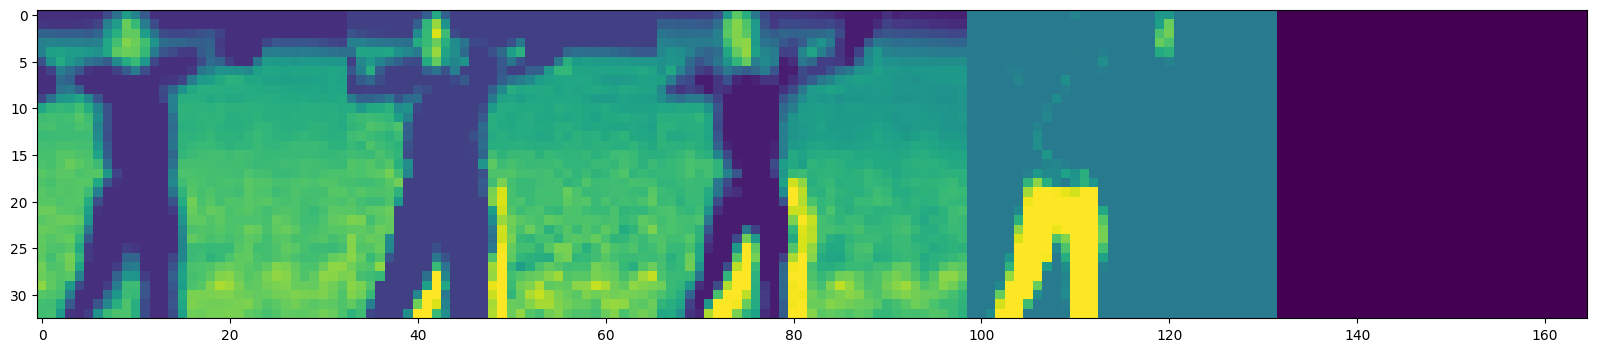

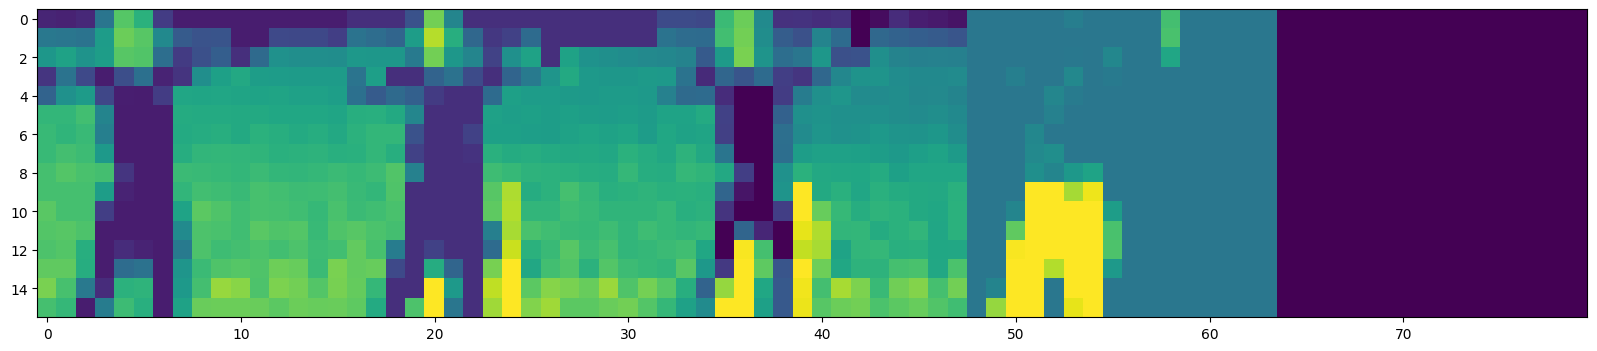

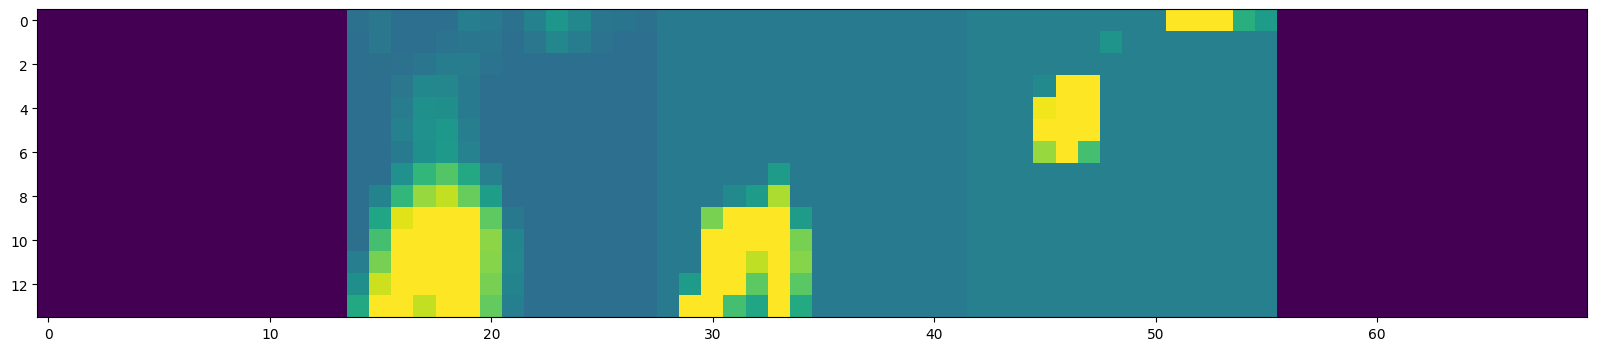

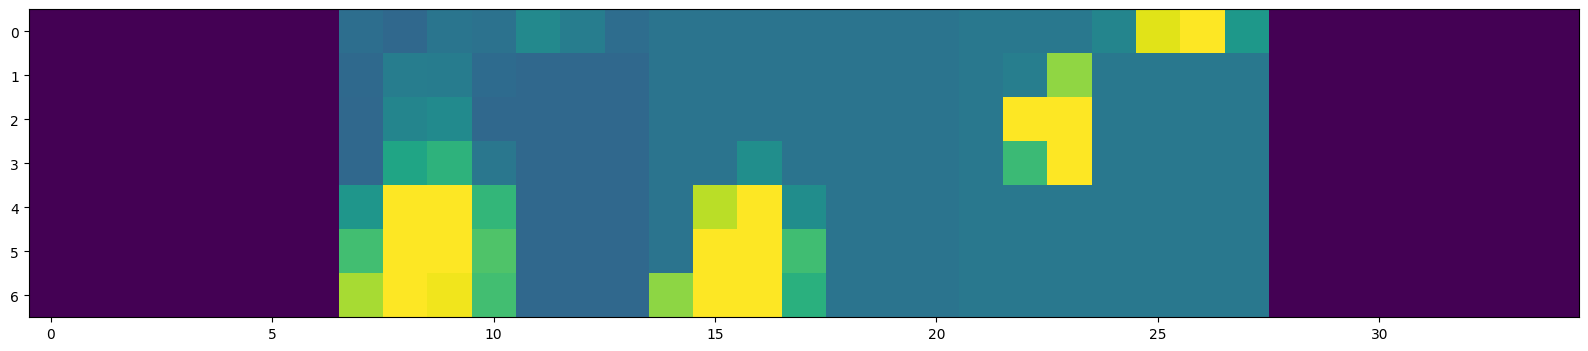

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = 5
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    #plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [24]:
import numpy as np
from google.colab import files
#from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 6d77ed8175e10908144b3af2a48173d9_t.jpeg to 6d77ed8175e10908144b3af2a48173d9_t.jpeg
Saving gahag-0037384573-1.jpg to gahag-0037384573-1.jpg
Saving images.jpeg to images.jpeg
Saving images22.jpeg to images22.jpeg
Saving images33.jpeg to images33.jpeg
Saving img_os06.jpg to img_os06.jpg
Saving publicdomainq-0032819ktf.jpg to publicdomainq-0032819ktf.jpg
1/1 [==============================] - 0s 18ms/step
[[1.]]
[1.]
6d77ed8175e10908144b3af2a48173d9_t.jpeg is a human
1/1 [==============================] - 0s 18ms/step
[[0.]]
[0.]
gahag-0037384573-1.jpg is a horse
1/1 [==============================] - 0s 18ms/step
[[1.]]
[1.]
images.jpeg is a human
1/1 [==============================] - 0s 18ms/step
[[0.99999595]]
[0.99999595]
images22.jpeg is a human
1/1 [==============================] - 0s 18ms/step
[[0.]]
[0.]
images33.jpeg is a horse
1/1 [==============================] - 0s 19ms/step
[[0.9999527]]
[0.9999527]
img_os06.jpg is a human
1/1 [==============================] - 0s 18

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)